In [1]:
import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_text as text


import pandas as pd

In [2]:
#reading file

df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()


Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
#downsampling ham category

df_spam=df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [6]:

df_ham=df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [7]:
df_ham_dsmaple=df_ham.sample(df_spam.shape[0])

In [8]:
df_ham_dsmaple.shape

(747, 2)

In [9]:
df_balanced=pd.concat([df_spam,df_ham_dsmaple])
df_balanced.shape

(1494, 2)

In [10]:
df_balanced['Category'].value_counts()

Category
spam    747
ham     747
Name: count, dtype: int64

In [11]:
df_balanced.sample(5)

,Category,Message
660,spam,88800 and 89034 are premium phone services cal...
2417,ham,"Could you not read me, my Love ? I answered you"
4728,spam,Had your mobile 10 mths? Update to the latest ...
2808,spam,December only! Had your mobile 11mths+? You ar...
3930,ham,Yes. Nigh you cant aha.


In [12]:
#dummy variable

df_dummy=pd.get_dummies(df_balanced['Category'],drop_first=True,dtype=int)
df_dummy

,spam
2,1
5,1
8,1
9,1
11,1
...,...
4681,0
1671,0
4784,0
72,0


In [13]:
df_dummy.shape

(1494, 1)

In [14]:
df_balanced=pd.concat([df_balanced,df_dummy],axis=1)

In [15]:
df_balanced

,Category,Message,spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
4681,ham,"That's cool he'll be here all night, lemme kno...",0
1671,ham,Lmao!nice 1,0
4784,ham,Especially since i talk about boston all up in...,0
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,0


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(df_balanced['Message'],df_balanced['spam'],stratify=df_balanced['spam'])

In [25]:
# BERT
bert_encoder=hub.KerasLayer('https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/bert-en-uncased-l-10-h-768-a-12/versions/2')
bert_preprocess=hub.KerasLayer('https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3')

In [27]:
def get_sentence_embeddig(sentence):
    return (bert_encoder(bert_preprocess(sentence))['pooled_output'])


In [29]:
get_sentence_embeddig(['hello whats up'])

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.2455703 ,  0.08050564,  0.9990451 ,  0.95179427, -0.96158814,
        -0.03655338,  0.9999762 , -0.6674263 ,  0.41902918,  0.36317277,
         0.03381462,  0.31483537, -0.06245948, -0.02727539, -0.1804364 ,
        -0.6140318 ,  0.96792966, -0.00184457,  0.27918756,  0.74794024,
         0.5897801 , -0.9977413 ,  0.05776735, -0.31741673,  0.21815084,
         0.96229446,  0.21603857, -0.15839198, -0.12252098,  0.24085304,
        -0.20101336,  0.99477226,  0.5842218 , -0.9981197 , -0.03691851,
         0.99115616,  0.99873954,  0.0418791 , -0.30843014, -0.25863302,
        -0.10304545, -0.95739365, -0.34223577,  0.00372807, -0.08899519,
         0.42819244, -0.13421519, -0.27243716,  0.508939  , -0.14041045,
         0.9873872 ,  0.12881577,  0.07644755, -0.31699473,  0.45958588,
        -0.9684741 , -0.69241387,  0.86008334,  0.99970084,  0.99871767,
        -0.5481611 ,  0.18672559,  0.26622048,  0.39134642,  0.2699609 ,
 

In [42]:
e=get_sentence_embeddig([
    'banana',
    'apple',
    'mango',
    'jeff bezoz',
    'elon musk',
    'bill gates'
    
])

In [43]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.25603375,  0.33182472,  0.8329441 , ...,  0.66625994,
        -0.6272068 , -0.01630283],
       [ 0.3497061 , -0.14382474,  0.22438778, ...,  0.01161897,
        -0.26782903, -0.31236592],
       [-0.02383204,  0.5706705 , -0.6053118 , ...,  0.66652757,
        -0.47224352,  0.01885891],
       [ 0.42072842,  0.3008048 , -0.00977876, ...,  0.3450734 ,
        -0.08169457,  0.07818229],
       [ 0.61939794,  0.33138868,  0.09326481, ...,  0.18473193,
         0.03017475, -0.02672951],
       [ 0.37309808,  0.51502466,  0.66797006, ...,  0.2142041 ,
        -0.24310598,  0.28810945]], dtype=float32)>

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[3],e[4]])[1][0]

0.8444116

In [52]:
#Bert Layers
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name="text")
preprocessed=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed)

#Neural Network Layers
first=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
second=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(first)

#final model
model=tf.keras.Model(inputs=[text_input],outputs=[second])


In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [60]:
Metrices=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
    
]

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=Metrices
    
)

In [61]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 26s 507ms/step - loss: 0.4922 - accuracy: 0.7955 - precision: 0.7674 - recall: 0.8482
Epoch 2/10
35/35 [==============================] - 18s 504ms/step - loss: 0.3193 - accuracy: 0.9018 - precision: 0.8801 - recall: 0.9304
Epoch 3/10
35/35 [==============================] - 18s 512ms/step - loss: 0.2377 - accuracy: 0.9464 - precision: 0.9296 - recall: 0.9661
Epoch 4/10
35/35 [==============================] - 18s 513ms/step - loss: 0.1996 - accuracy: 0.9509 - precision: 0.9422 - recall: 0.9607
Epoch 5/10
35/35 [==============================] - 18s 514ms/step - loss: 0.1723 - accuracy: 0.9580 - precision: 0.9492 - recall: 0.9679
Epoch 6/10
35/35 [==============================] - 18s 515ms/step - loss: 0.1590 - accuracy: 0.9571 - precision: 0.9444 - recall: 0.9714
Epoch 7/10
35/35 [==============================] - 18s 515ms/step - loss: 0.1450 - accuracy: 0.9607 - precision: 0.9558 - recall: 0.9661
Epoch 8/10
35/35 [================

In [62]:
model.evaluate(X_test,Y_test)

12/12 [==============================] - 7s 501ms/step - loss: 0.1397 - accuracy: 0.9519 - precision: 0.9617 - recall: 0.9412


[0.13970351219177246,
 0.9518716335296631,
 0.9617486596107483,
 0.9411764740943909]

In [64]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten()

12/12 [==============================] - 6s 502ms/step


In [65]:
import numpy as np
y_predicted=np.where(y_predicted>0.5,1,0)
y_predicted

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

cm=(confusion_matrix(Y_test,y_predicted))
cm

array([[180,   7],
       [ 11, 176]], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

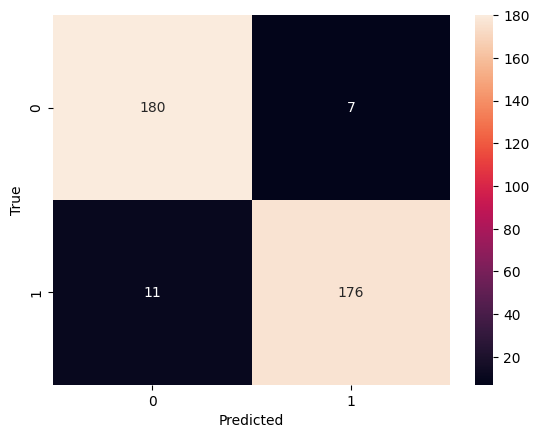

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')


In [73]:
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       187
           1       0.96      0.94      0.95       187

    accuracy                           0.95       374
   macro avg       0.95      0.95      0.95       374
weighted avg       0.95      0.95      0.95       374



In [83]:
z=model.predict(X_test)
z

12/12 [==============================] - 6s 498ms/step


array([[1.50649631e-02],
       [9.84643221e-01],
       [9.27526474e-01],
       [9.67571199e-01],
       [2.19163368e-03],
       [3.97533506e-01],
       [9.79788840e-01],
       [2.89975628e-02],
       [6.52066544e-02],
       [1.10684650e-03],
       [9.61356878e-01],
       [3.13535869e-01],
       [9.84643221e-01],
       [9.85107720e-01],
       [4.80674803e-02],
       [2.65536815e-01],
       [2.68279165e-02],
       [9.35377002e-01],
       [9.93945777e-01],
       [4.19694930e-02],
       [3.17771025e-02],
       [9.46949720e-01],
       [9.90807116e-01],
       [1.21833146e-01],
       [9.79565918e-01],
       [1.64264988e-03],
       [9.92544413e-01],
       [9.90167379e-01],
       [5.02581596e-02],
       [5.70417106e-01],
       [1.42428568e-02],
       [9.94282961e-01],
       [3.76849234e-01],
       [6.16219789e-02],
       [3.55492562e-01],
       [9.95219290e-01],
       [2.14562248e-02],
       [1.56238884e-01],
       [1.99853048e-01],
       [2.73800138e-02],


In [124]:
#Testing

text=input('Enter a text')
a=model.predict(pd.Series(text)).flatten()
a=np.where(a>0.5,'Spam','Ham')

a[0]

Enter a text Winner!! You have wone Iphone 13 pr max 5g


1/1 [==============================] - 0s 32ms/step


'Spam'